# Predict a car's marker price

## Inroduction

We'll practice the machine learning workflow. The data set we'll be working with contains information on various cars. Dataset's documentation is [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
#Set the value of the specified option of Pandas
pd.set_option('display.max_columns', 26)

We'll read file 'imports-85.data' into a dataframe named `cars`.

In [4]:
name_column = ['symb','normalized-losses', 'name_car', 'fuel', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
               'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
              'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
              'price']
cars = pd.read_csv('imports-85.data', header=0, names = name_column)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symb                 204 non-null int64
normalized-losses    204 non-null object
name_car             204 non-null object
fuel                 204 non-null object
aspiration           204 non-null object
num-of-doors         204 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression-ratio    204 non-null float64
horsepower           204 non-nul

The following columns are numeric and can be used as features: *normalized-losses, wheel-base, lenght, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg*. The target column is *price*. 

In [6]:
cars.head(5)

,symb,normalized-losses,name_car,fuel,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                   'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
                   'city-mpg', 'highway-mpg', 'price']
cars_numeric = cars[numeric_columns]

We took new data set from *cars* which had only numeric data.

In [8]:
cars_numeric.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950


## Data cleaning

Our data set contains missing values such as *'?'*. We need to replace these values and look for the presence of missing values in other numeric columns.

We'll replace all of '?' values with the `numpy.nan` missing values.

In [9]:
cars_numeric = cars_numeric.replace('?', np.nan)
cars_numeric.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950


Some columns need to be converted to numeric type.

In [10]:
cars_numeric = cars_numeric.astype('float')
cars_numeric.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We'll remove any rows with missing *price* values because column *price* is needed to predict the price.

In [11]:
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

We'll replace the remaining missing values using the average values from the columns.

In [12]:
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [13]:
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now we'll normalize the numeric columns so all values range from 0 to 1.

In [14]:
price = cars_numeric['price']
cars_numeric = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())
cars_numeric['price'] = price

In [15]:
cars_numeric.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0


## Univariate Model

We'll create a fuction that encapsulates the training and simple validation process. The function will have 3 parameters - training column name, target column name, and the dataframe object.

In [16]:
def knn_train_test(train_column, target_column, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    idx = len(df) // 2
    train = df.iloc[:idx]
    test = df.iloc[idx:]
    
    knn.fit(train[[train_column]],train[target_column])
    prediction = knn.predict(test[[train_column]])
    mse = mean_squared_error(test[target_column], prediction)
    rmse = mse ** 0.5
    return rmse
    


We'll train and test univariate models using the different numeric columns in the data set.

In [17]:
rmse_columns = {}
columns = cars_numeric.columns.drop('price')
for i in columns:
    rmse = knn_train_test(i, 'price', cars_numeric)
    rmse_columns[i] = rmse

In [18]:
print (rmse_columns)

{'compression-ratio': 7193.5885991346495, 'wheel-base': 5443.857347028851, 'peak-rpm': 6458.378473332141, 'height': 7380.628859304605, 'engine-size': 3247.180990459263, 'stroke': 8184.186085763203, 'city-mpg': 3813.193148373158, 'horsepower': 4456.175620282486, 'highway-mpg': 3737.1620469013646, 'length': 5150.4491768776825, 'normalized-losses': 8291.523385820003, 'curb-weight': 3439.4916393560256, 'width': 3773.135498600601, 'bore': 6206.9245622933095}


To create the Series object from dictionary.

In [19]:
rmse_series = pd.Series(rmse_columns)
rmse_series.sort_values()

engine-size          3247.180990
curb-weight          3439.491639
highway-mpg          3737.162047
width                3773.135499
city-mpg             3813.193148
horsepower           4456.175620
length               5150.449177
wheel-base           5443.857347
bore                 6206.924562
peak-rpm             6458.378473
compression-ratio    7193.588599
height               7380.628859
stroke               8184.186086
normalized-losses    8291.523386
dtype: float64

Now we'll modify the function *knn_train_test* by adding parameter for *k*.

In [20]:
def knn_train_test(train_column, target_column, df):
    rmse = {}
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    idx = len(df) // 2
    train = df.iloc[:idx]
    test = df.iloc[idx:]
    k_values = [1,3,5,7,9]
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train[[train_column]],train[target_column])
        prediction = knn.predict(test[[train_column]])
        mse = mean_squared_error(test[target_column], prediction)
        rmse[i] = mse ** 0.5
    return rmse
    

In [21]:
k_rmse = {}
columns = cars_numeric.columns.drop('price')
for i in columns:
    rmse = knn_train_test(i, 'price', cars_numeric)
    k_rmse[i] = rmse


In [22]:
k_rmse

{'bore': {1: 5926.514010782393,
  3: 5927.911351770069,
  5: 6206.9245622933095,
  7: 6239.1231894606235,
  9: 6407.868283419558},
 'city-mpg': {1: 4170.034286429789,
  3: 3438.0091973569693,
  5: 3813.193148373158,
  7: 3706.737982542668,
  9: 3811.0390099593706},
 'compression-ratio': {1: 7344.202947903877,
  3: 5943.417906577177,
  5: 7193.5885991346495,
  7: 7540.580427735179,
  9: 7180.410828835924},
 'curb-weight': {1: 4390.877922466076,
  3: 3668.3589437240184,
  5: 3439.4916393560256,
  7: 3174.0695108639184,
  9: 3373.692477825783},
 'engine-size': {1: 3398.1555291069303,
  3: 3143.6417681833063,
  5: 3247.180990459263,
  7: 3058.254836187008,
  9: 3141.6475726897906},
 'height': {1: 10910.35914761746,
  3: 7805.349593138741,
  5: 7380.628859304605,
  7: 7272.536203121596,
  9: 7121.205659190993},
 'highway-mpg': {1: 3667.7066335790814,
  3: 3602.7490403548477,
  5: 3737.1620469013646,
  7: 3963.0230166902043,
  9: 3972.4730855050143},
 'horsepower': {1: 4183.096630487993,
  3

We'll visualize the results using a scatter plot.

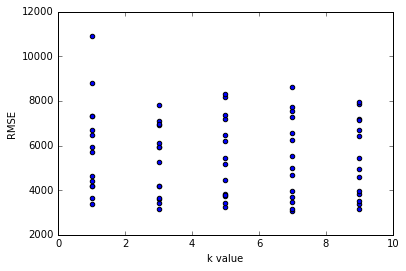

In [23]:
%matplotlib inline
for k,v in k_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
  


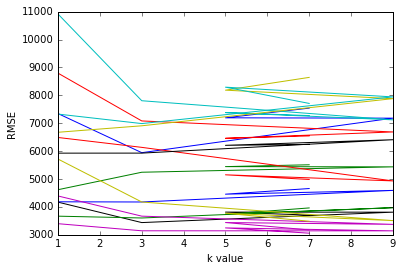

In [24]:
for k,v in k_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate Model

We'll compute average RMSE for different *k* values for each features. 

In [32]:
average_rmse = {}
for k,v in k_rmse.items():
    avg = np.mean(list(v.values()))
    average_rmse[k] = avg
    
series_avg_rmse = pd.Series(average_rmse)
series_avg_rmse = series_avg_rmse.sort_values()
print (series_avg_rmse)
choose_features = series_avg_rmse.index

engine-size          3197.776139
curb-weight          3609.298099
city-mpg             3787.802725
highway-mpg          3788.622765
width                4131.406807
horsepower           4412.960576
wheel-base           5249.730986
length               5537.461758
bore                 6141.668280
compression-ratio    7040.440142
peak-rpm             7112.435583
normalized-losses    7651.230485
stroke               7657.690117
height               8098.015892
dtype: float64


In [33]:
choose_features

Index(['engine-size', 'curb-weight', 'city-mpg', 'highway-mpg', 'width',
       'horsepower', 'wheel-base', 'length', 'bore', 'compression-ratio',
       'peak-rpm', 'normalized-losses', 'stroke', 'height'],
      dtype='object')

We'll modify the *knn_train_test()* function to work with multiple columns.

In [40]:
def knn_train_test(train_column, target_column, df):
    rmse = {}
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    idx = len(df) // 2
    train = df.iloc[:idx]
    test = df.iloc[idx:]
# we train and test model using default k=5    
    k_values = 5
   
    #for i in k_values:
        
    knn = KNeighborsRegressor(n_neighbors=k_values)
    knn.fit(train[train_column],train[target_column])
    prediction = knn.predict(test[train_column])
    mse = mean_squared_error(test[target_column], prediction)
    rmse[k_values] = mse ** 0.5
        
    return rmse

In [41]:
features_rmse = {}

for features in range(2,7):
    features_rmse['{} features'.format(features)] = knn_train_test(choose_features[:features],
                                                                  'price', cars_numeric) 
    

In [42]:
features_rmse

{'2 features': {5: 2776.7887244801323},
 '3 features': {5: 3007.3486027396293},
 '4 features': {5: 3207.3124028694183},
 '5 features': {5: 2660.144132034954},
 '6 features': {5: 2725.7622112722893}}

## Hyperparameter Tuning

Now we'll otmimize the model for hyperparameter from 1 to 25.

In [47]:
def knn_train_test(train_column, target_column, df):
    rmse = {}
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    df = df.reindex(random_index)
    idx = len(df) // 2
    train = df.iloc[:idx]
    test = df.iloc[idx:]
 
    k_values = [i for i in range(1,26)]
   
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(train[train_column],train[target_column])
        prediction = knn.predict(test[train_column])
        mse = mean_squared_error(test[target_column], prediction)
        rmse[i] = mse ** 0.5
        
    return rmse

In [48]:
features_rmse = {}

for features in range(2,7):
    features_rmse['{} features'.format(features)] = knn_train_test(choose_features[:features],
                                                                  'price', cars_numeric) 

In [49]:
features_rmse

{'2 features': {1: 3405.0011057266925,
  2: 2806.815926009399,
  3: 2832.046659416315,
  4: 2755.885691343166,
  5: 2776.7887244801323,
  6: 2845.331496943722,
  7: 2939.963979267051,
  8: 3090.0602294645896,
  9: 3287.39623079902,
  10: 3425.1888036865944,
  11: 3584.4292620828824,
  12: 3635.5259878023303,
  13: 3663.6037412497835,
  14: 3664.5333259279732,
  15: 3681.5923927742647,
  16: 3707.625229104499,
  17: 3740.66261656526,
  18: 3711.4044350521394,
  19: 3747.9428945198347,
  20: 3731.3753714046247,
  21: 3721.4542332692286,
  22: 3754.542140976416,
  23: 3768.9635970788922,
  24: 3805.6710862613386,
  25: 3838.1666278221946},
 '3 features': {1: 2777.6202422217475,
  2: 2606.028364197136,
  3: 2804.9334531618865,
  4: 2973.8428185388348,
  5: 3007.3486027396293,
  6: 3164.6180440931576,
  7: 3320.9176540989574,
  8: 3227.3661070455346,
  9: 3222.521540580632,
  10: 3381.7607558637264,
  11: 3514.6647126805688,
  12: 3478.188779838502,
  13: 3467.197769280226,
  14: 3425.76183

We'll plot the resulting RMSE values.

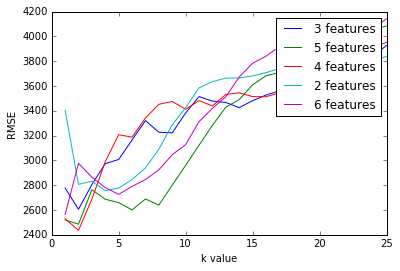

In [50]:
for k,v in features_rmse.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

Parameter *k* with a value about 2 is optimal for models with 2,3,4,5 features. Model with 6 features has optimal k = 1.
In this case, an increase in the number of features doesn't lead to decrease RMSE.

Our optimal model is for k = 2 and for 4 features (engine-size', 'curb-weight', 'city-mpg', 'highway-mpg').